In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [55]:
mu1 = np.array([200, 400])
n = 300
c11 = mu1[0] + np.random.randn(1, n) * np.sqrt(8)
c12 = mu1[1] + np.random.randn(1, n) * np.sqrt(30)
C1 = np.vstack([c11, c12])
C1.shape

(2, 300)

In [56]:
mu2 = np.array([100, -100])
n = 300
c21 = mu2[0] + np.random.randn(1, n) * np.sqrt(50)
c22 = mu2[1] + np.random.randn(1, n) * np.sqrt(20)
C2 = np.vstack([c21, c22])
C2.shape

(2, 300)

In [57]:
mu = np.stack([mu1, mu2]).T
mu

array([[ 200,  100],
       [ 400, -100]])

In [58]:
Sw = np.cov(C1) + np.cov(C2)
Sw

array([[56.3825398 , -3.05653545],
       [-3.05653545, 54.45234028]])

In [59]:
w = np.linalg.inv(Sw) @ (mu1 - mu2)
m = w[1] / w[0]
b = 0
pc1 = np.zeros(C1.shape)

In [60]:
for i in range(n):
    x0 = C1[0,i]
    y0 = C1[1,i]
    x1 = (m*y0+x0-m*b)/(m**2+1)
    y1 = m * x1 + b
    pc1[0,i] = x1
    pc1[1,i] = y1

In [61]:
pc1.shape

(2, 300)

In [62]:
pc2 = np.zeros(C2.shape)
for i in range(n):
    x0 = C2[0,i]
    y0 = C2[1,i]
    x1 = (m*y0+x0-m*b)/(m**2+1)
    y1 = m * x1 + b
    pc2[0,i] = x1
    pc2[1,i] = y1

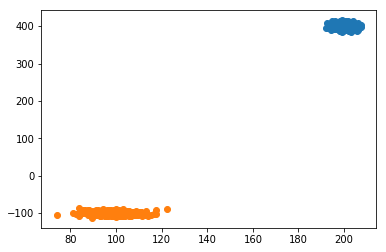

In [63]:
plt.scatter(c11[0], c12[0])
plt.scatter(c21[0], c22[0])
plt.show()

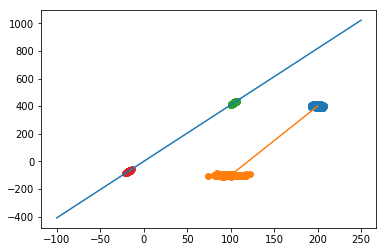

In [64]:
## 
xx = np.array(list(np.linspace(-100, 250, 1000)))
plt.plot(xx, m * xx)
plt.scatter(c11[0], c12[0])
plt.scatter(c21[0], c22[0])
plt.plot(mu[0,:], mu[1,:])
plt.scatter(pc1[0,:], pc1[1,:])
plt.scatter(pc2[0,:], pc2[1,:])
plt.show()

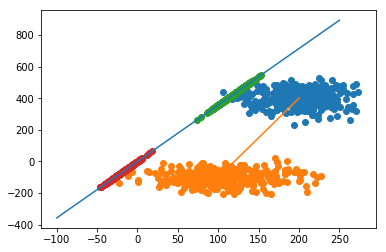

In [65]:
# increase covariance
n = 300
c11 = mu1[0] + np.random.randn(1, n) * np.sqrt(1000)
c12 = mu1[1] + np.random.randn(1, n) * np.sqrt(3000)
C1 = np.vstack([c11, c12])
n = 300
c21 = mu2[0] + np.random.randn(1, n) * np.sqrt(2000)
c22 = mu2[1] + np.random.randn(1, n) * np.sqrt(2000)
C2 = np.vstack([c21, c22])

Sw = np.cov(C1) + np.cov(C2)
w = np.linalg.inv(Sw) @ (mu1 - mu2)
m = w[1] / w[0]
b = 0
pc1 = np.zeros(C1.shape)
for i in range(n):
    x0 = C1[0,i]
    y0 = C1[1,i]
    x1 = (m*y0+x0-m*b)/(m**2+1)
    y1 = m * x1 + b
    pc1[0,i] = x1
    pc1[1,i] = y1
pc2 = np.zeros(C2.shape)
for i in range(n):
    x0 = C2[0,i]
    y0 = C2[1,i]
    x1 = (m*y0+x0-m*b)/(m**2+1)
    y1 = m * x1 + b
    pc2[0,i] = x1
    pc2[1,i] = y1
xx = np.array(list(np.linspace(-100, 250, 1000)))
plt.plot(xx, m * xx)
plt.scatter(c11[0], c12[0])
plt.scatter(c21[0], c22[0])
plt.plot(mu[0,:], mu[1,:])
plt.scatter(pc1[0,:], pc1[1,:])
plt.scatter(pc2[0,:], pc2[1,:])
plt.show()